In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt



In [ ]:
img = cv.imread('/content/drive/MyDrive/Imagens processing/IMG_20220423_175141.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

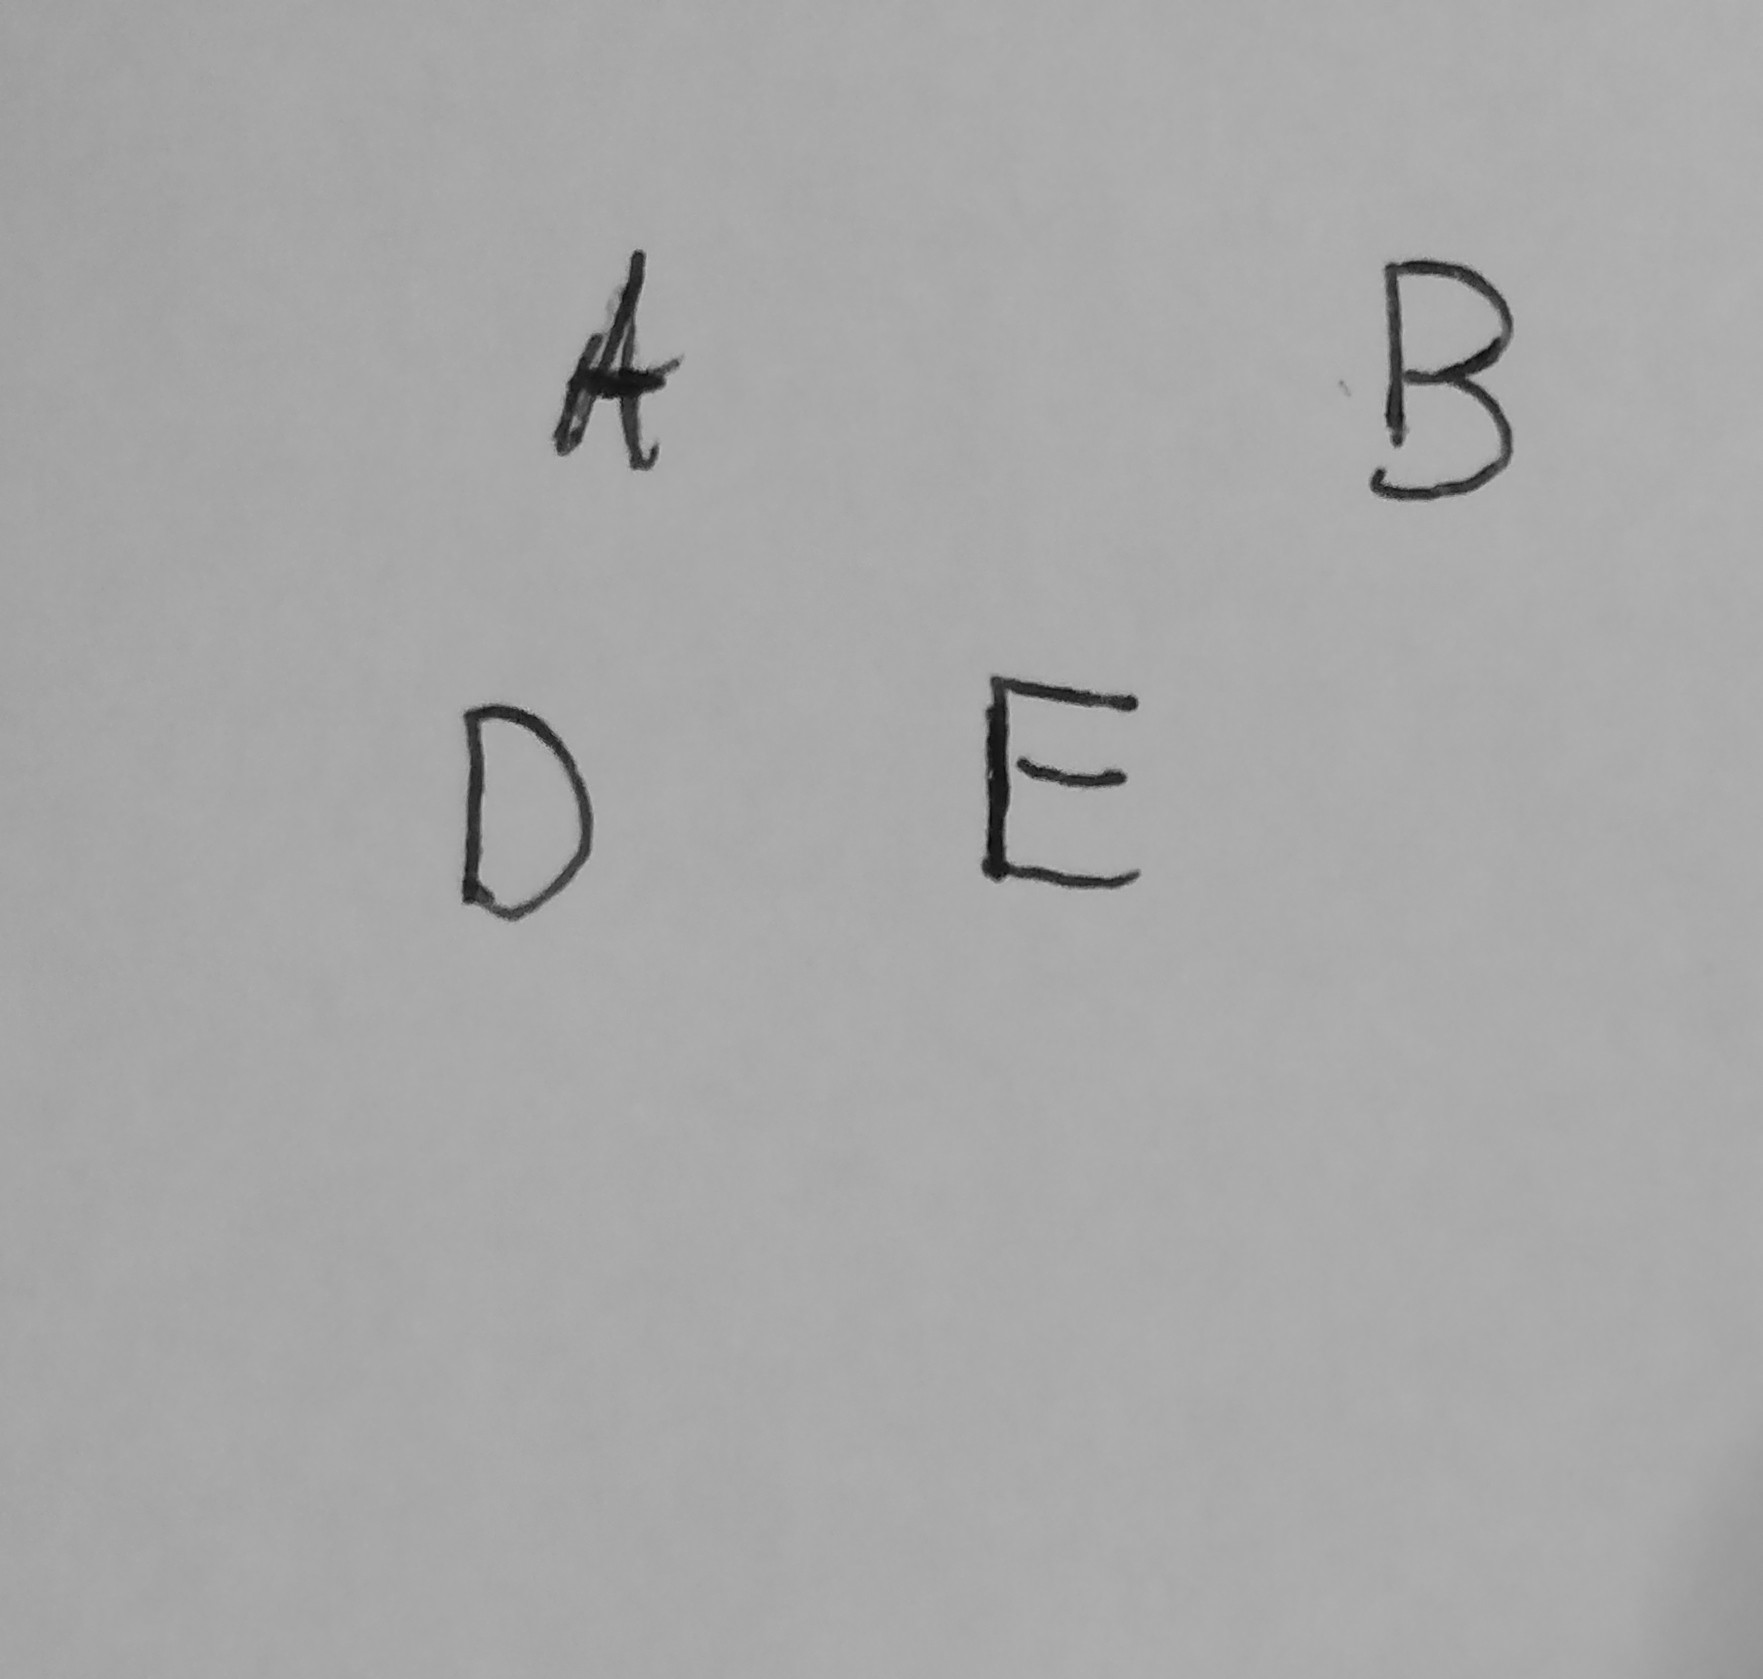

In [ ]:
from google.colab.patches import cv2_imshow
plt.imshow(gray)

In [ ]:
g_blur_img = cv.GaussianBlur(gray,(51,51),0)

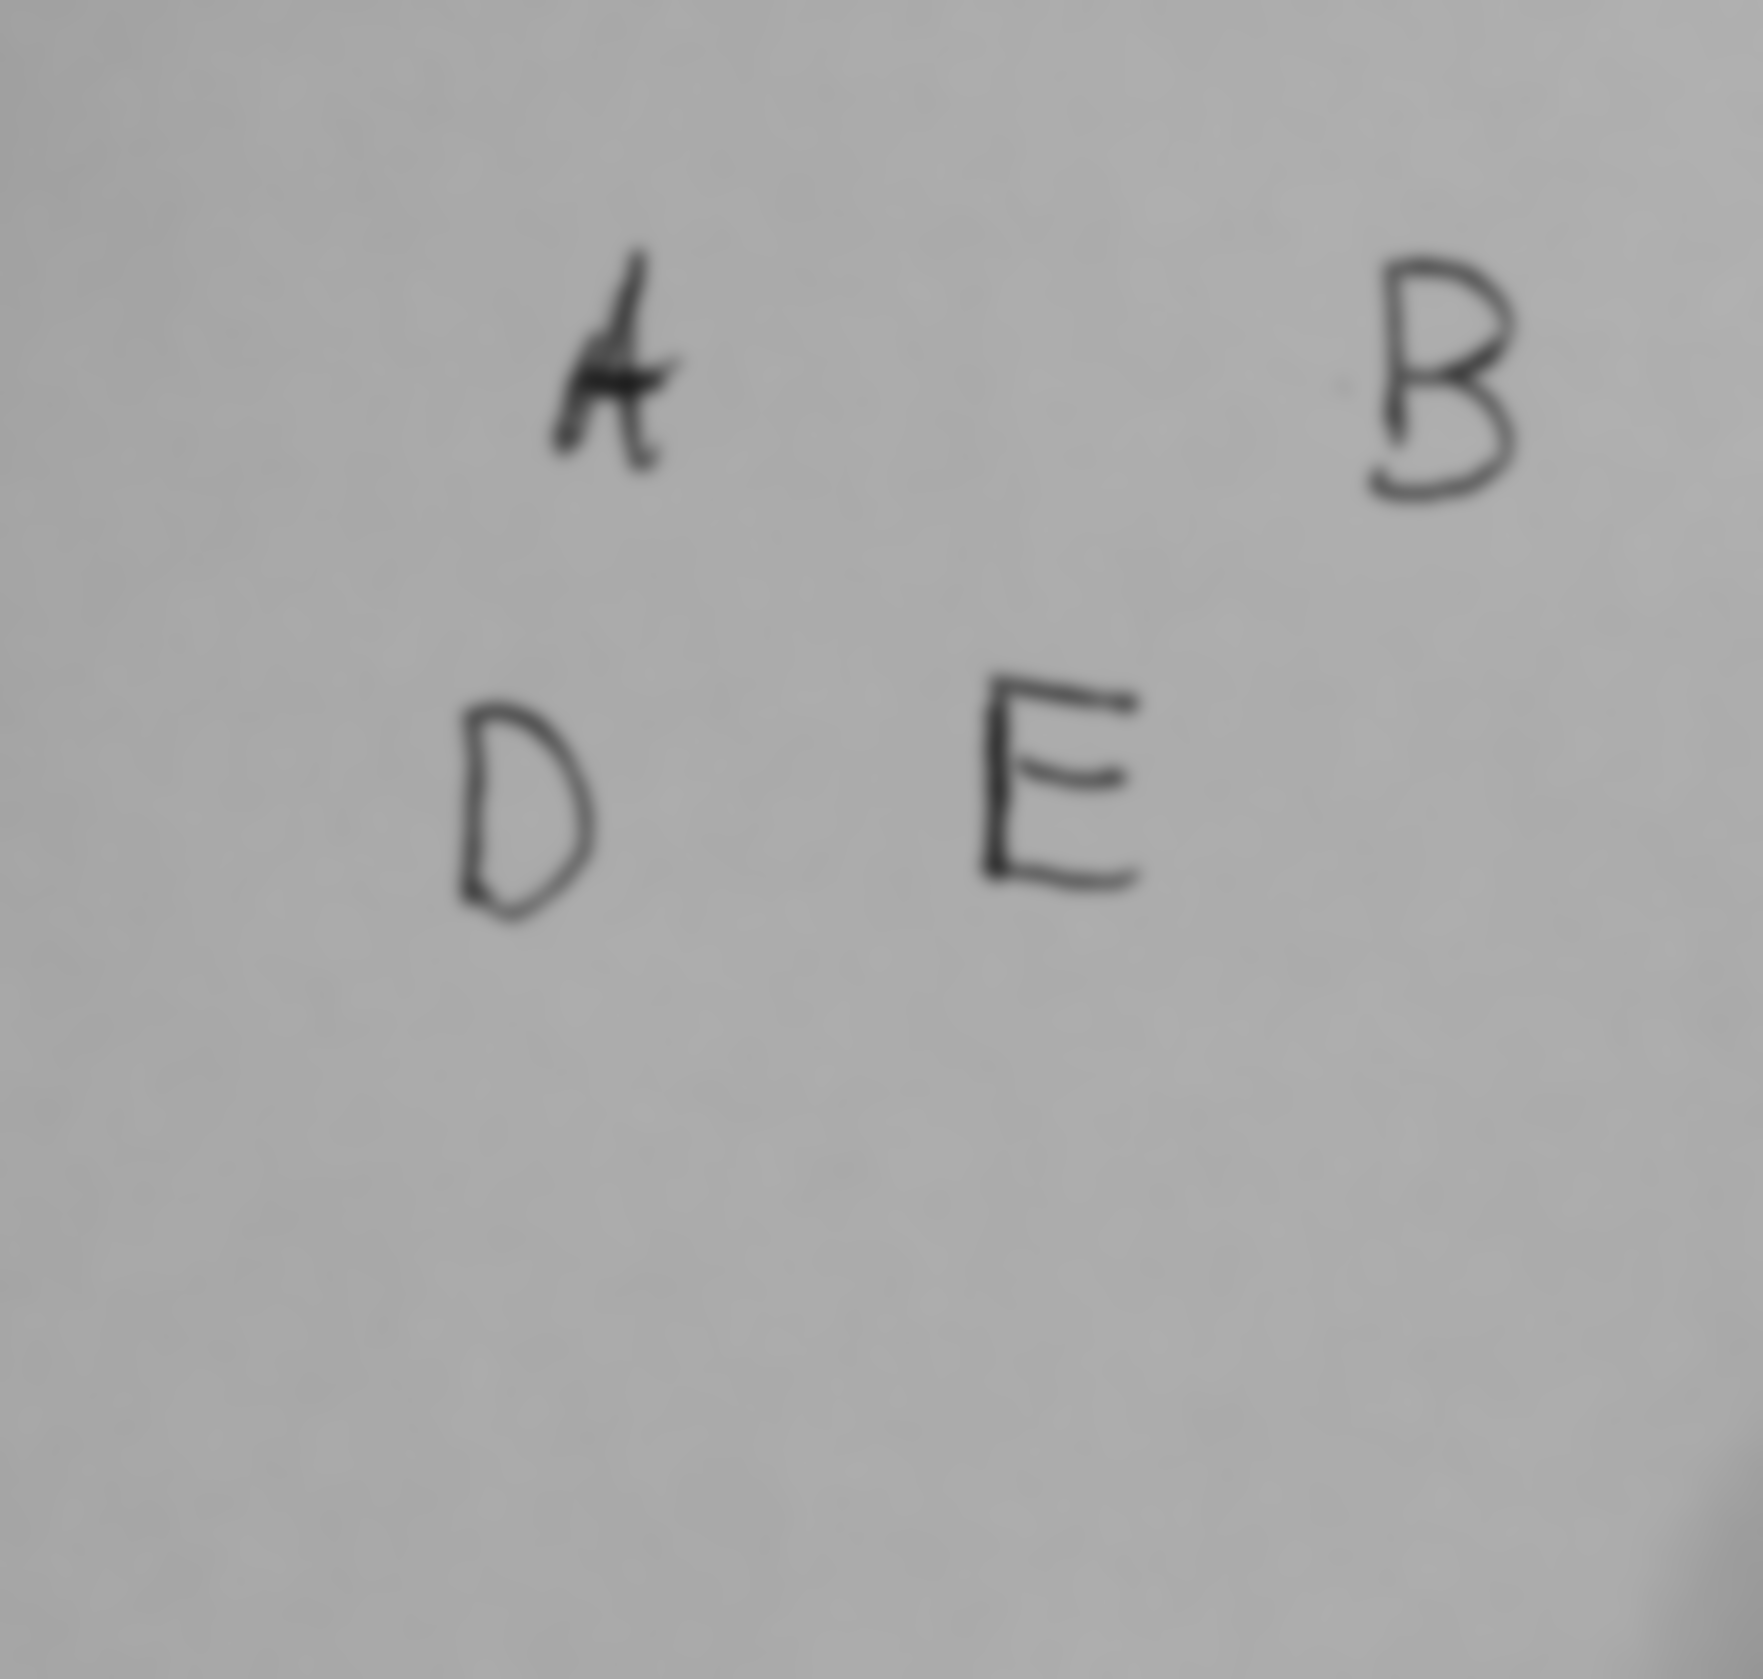

In [ ]:
cv2_imshow(g_blur_img)

In [ ]:

t_lower = 100  # Lower Threshold
t_upper = 200  # Upper threshold
aperture_size = 5  # Aperture size
  
  
# Applying the Canny Edge filter
edge_img = cv.Canny(g_blur_img, t_lower, t_upper,apertureSize=aperture_size)

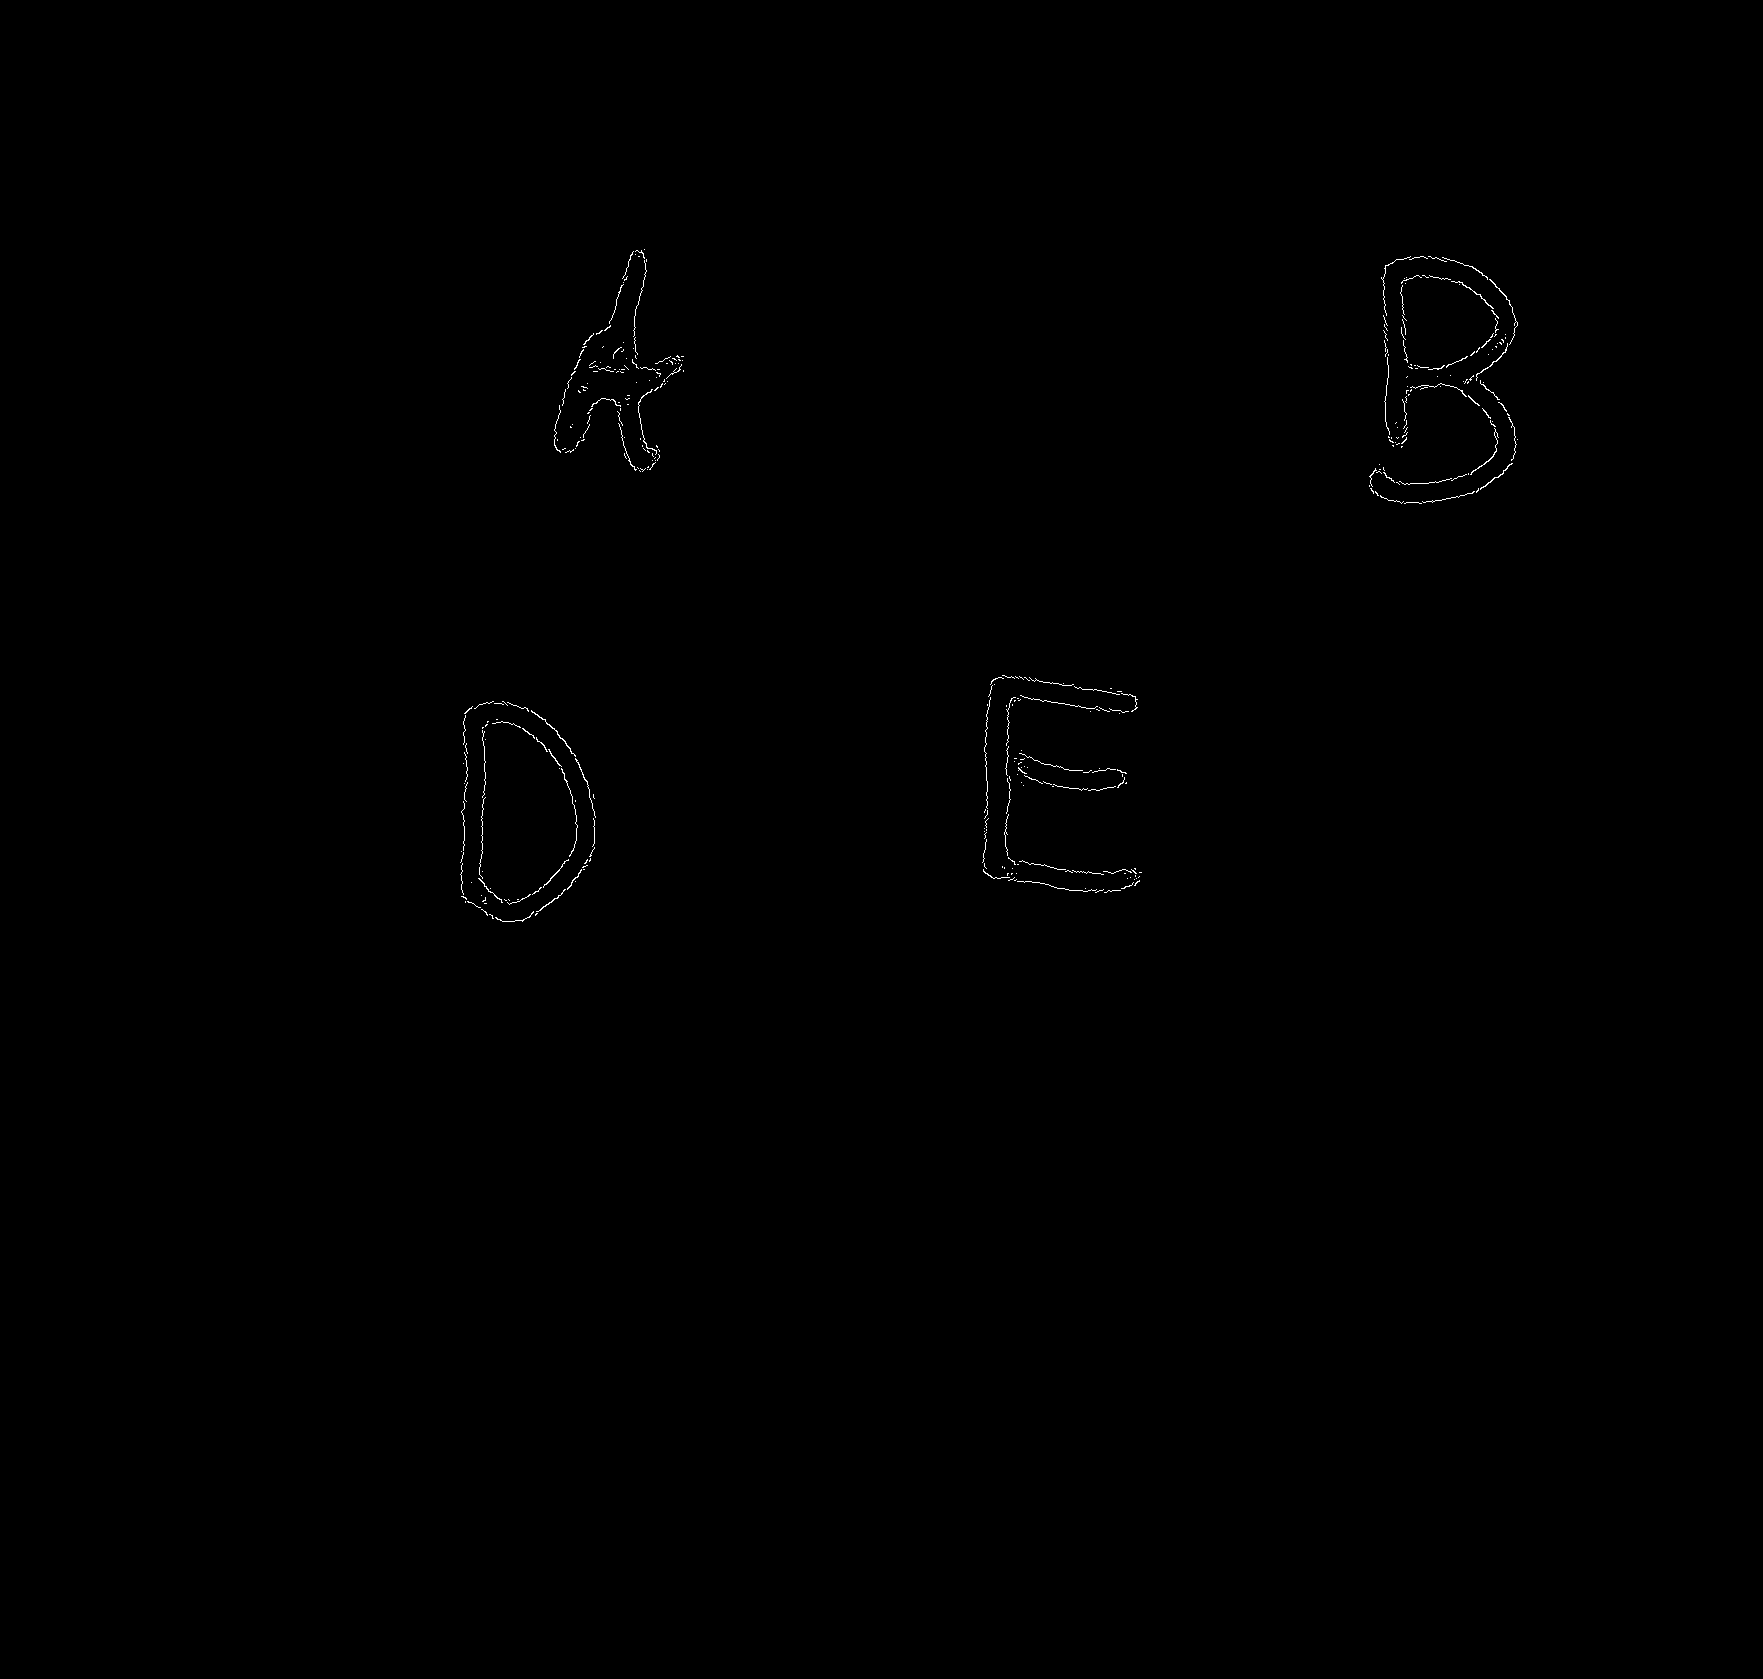

In [ ]:
cv2_imshow(edge_img)

In [ ]:
kernel = np.ones((20,20), np.uint8)
dilated_img = cv.dilate(edge_img,kernel,iterations = 1)

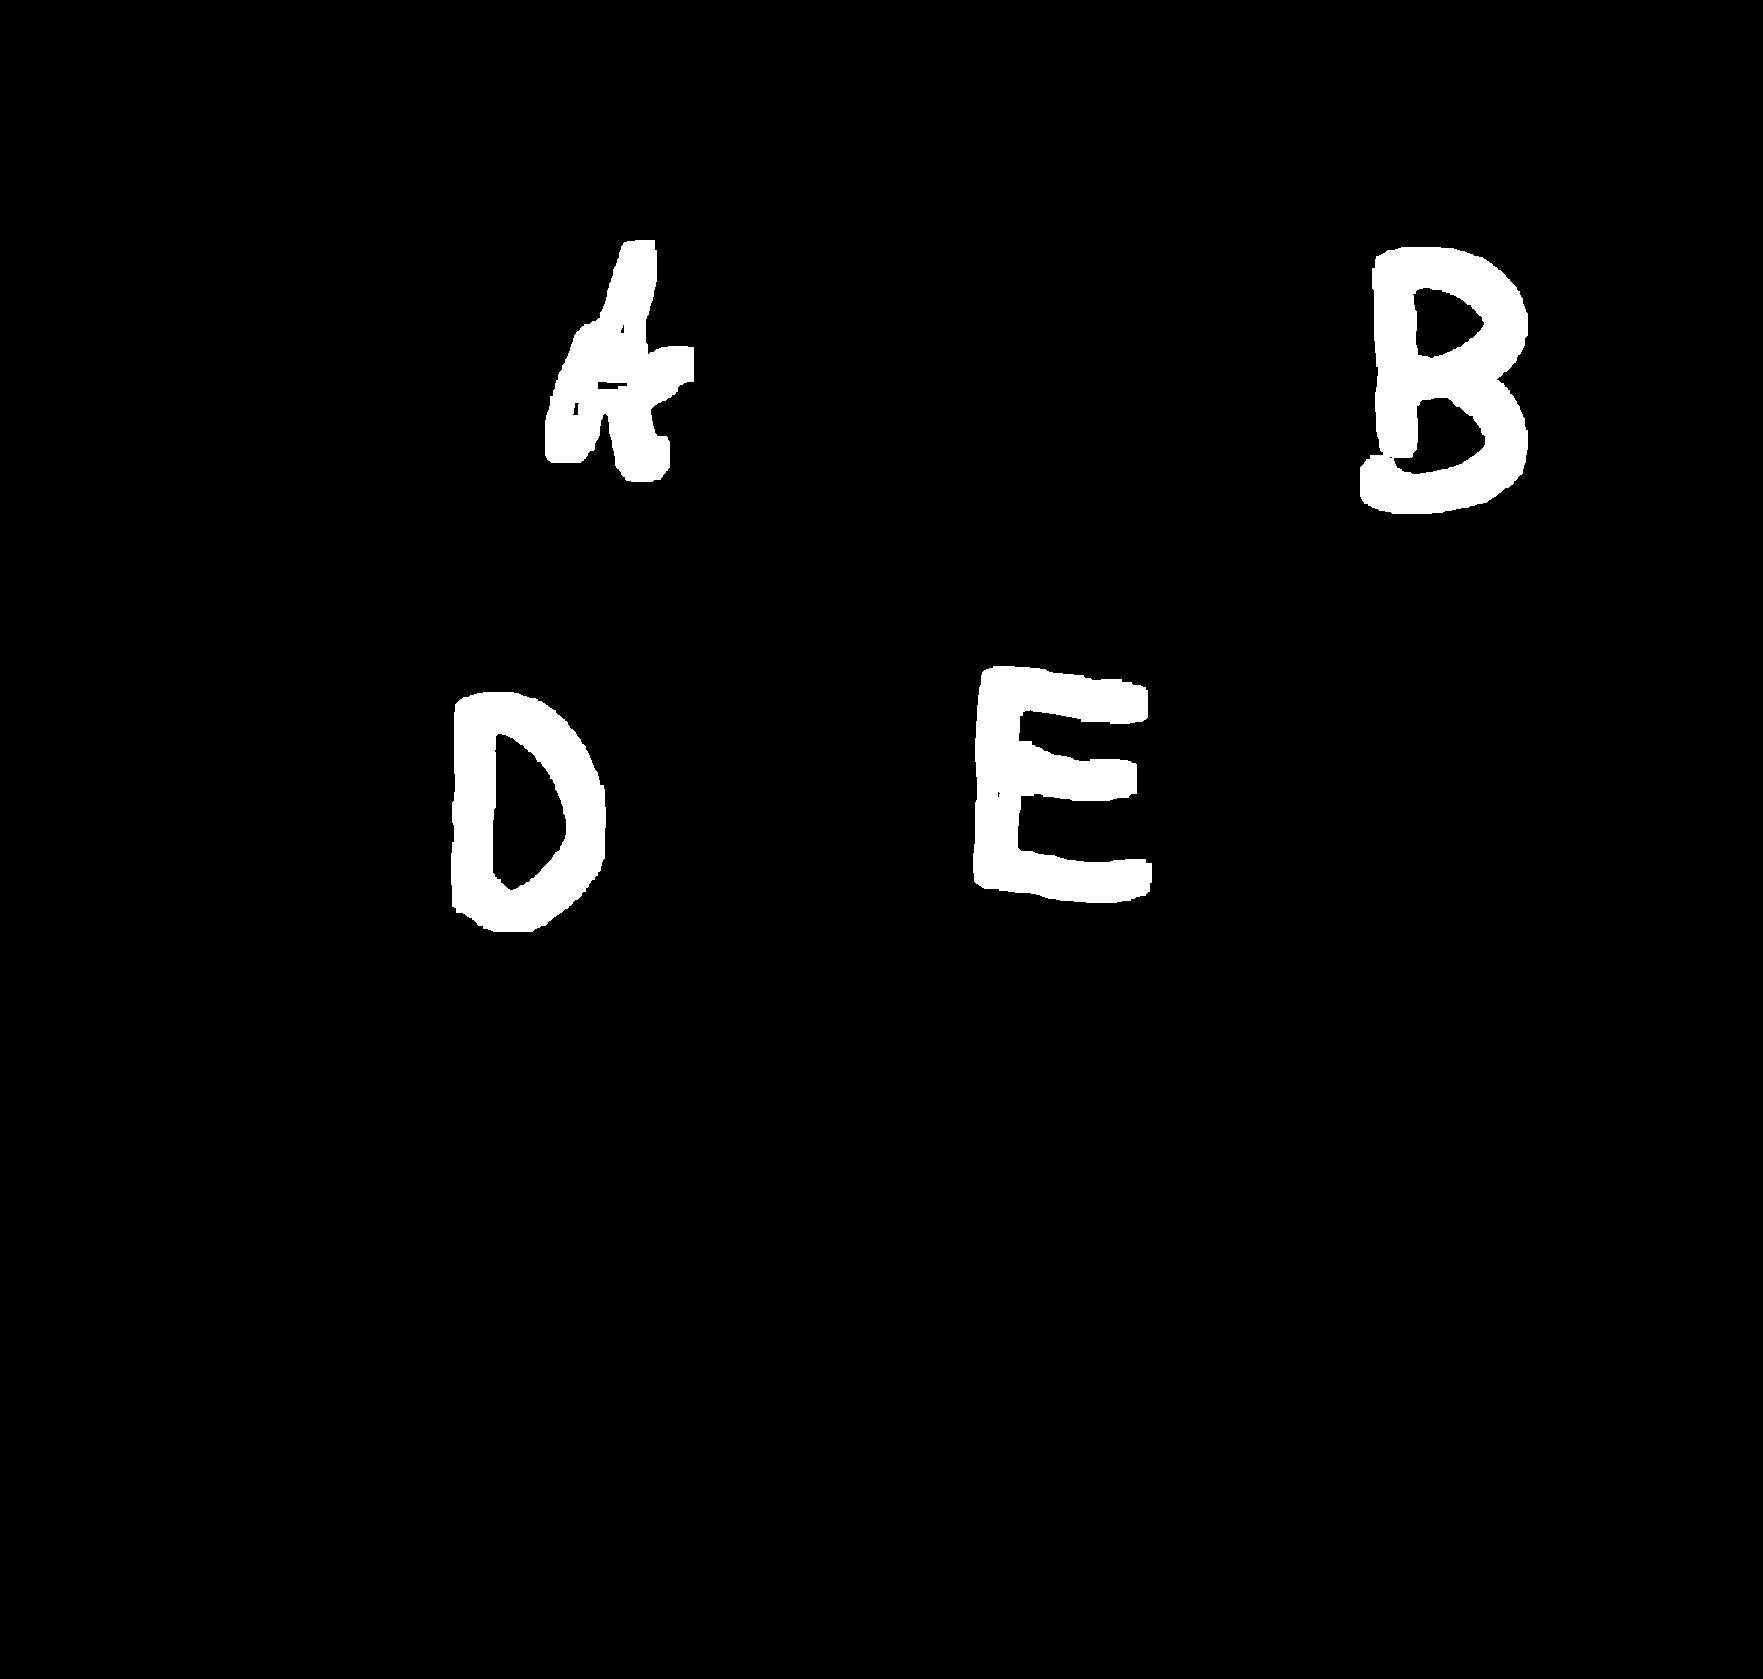

In [ ]:
cv2_imshow(dilated_img)

In [ ]:
contours, hierarchy = cv.findContours(dilated_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])

In [ ]:
boundRect

[(452, 693, 153, 239),
 (974, 666, 178, 237),
 (1360, 247, 168, 267),
 (545, 240, 149, 241)]

In [ ]:
import random as rng
#drawing = np.zeros((dilated_img.shape[0], dilated_img.shape[1], 3), dtype=np.uint8)
gray2 = gray.copy()
for i in range(len(contours)):
    color = (0,0,0)#(rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(gray2, contours_poly, i, color)
    cv.rectangle(gray2, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

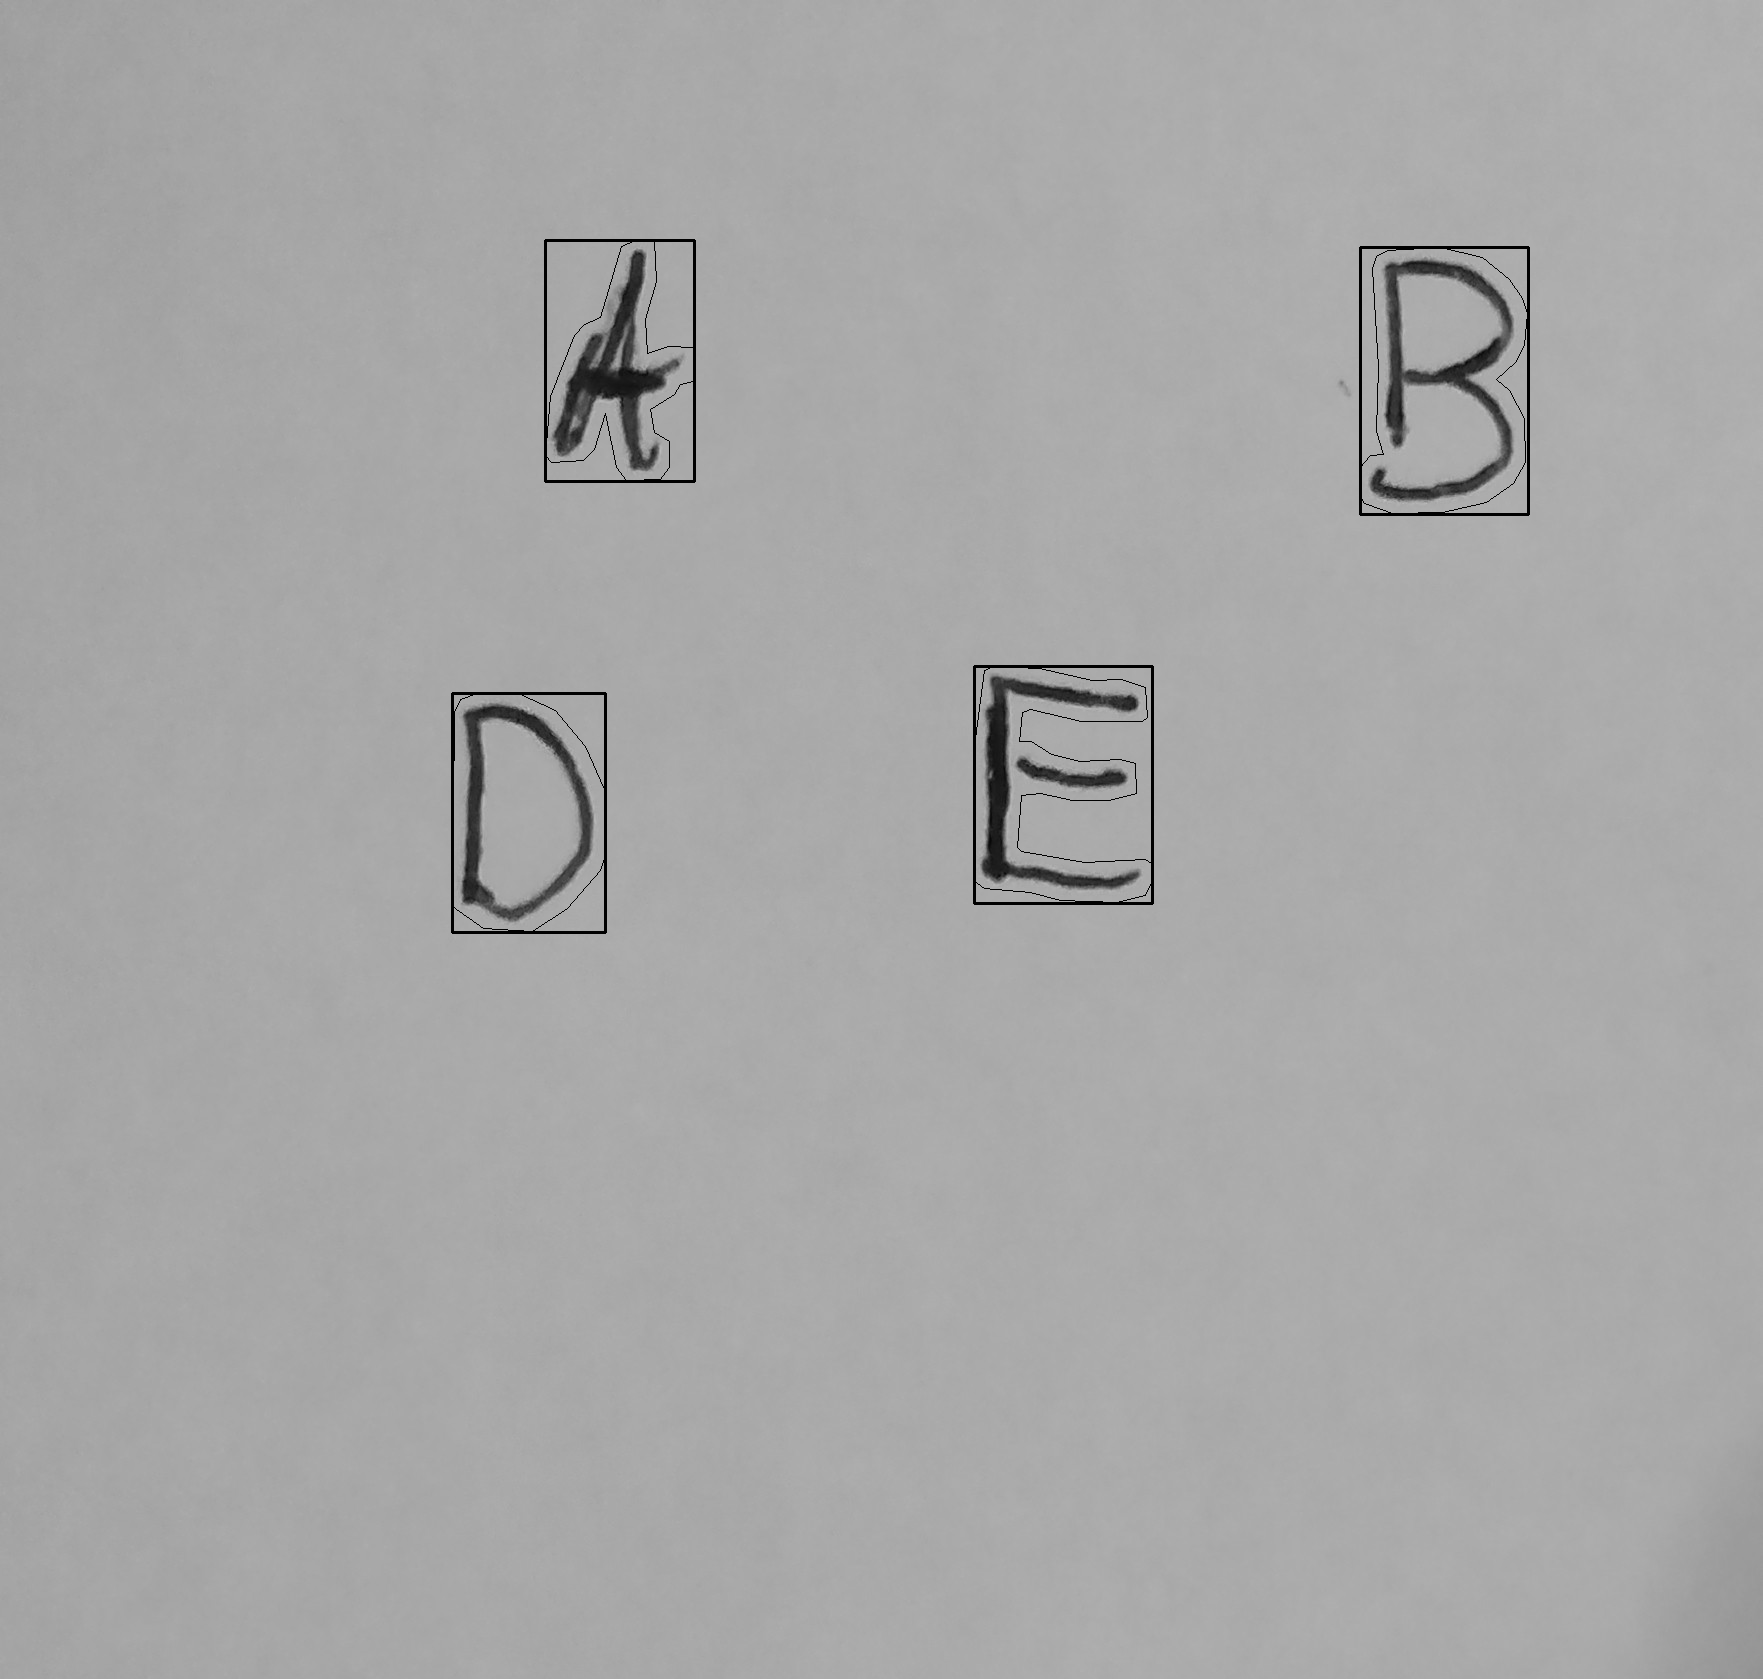

In [ ]:
cv2_imshow(gray2)

In [ ]:
letters = []
for i in boundRect:
  print(str(i[0])+'\n')
  letters.append(gray[i[1]:(i[1]+i[3]),i[0]:i[0]+i[2]])
  #plt.imshow(gray[i[2]:i[3],i[0]:i[1]])

452

974

1360

545



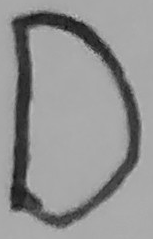

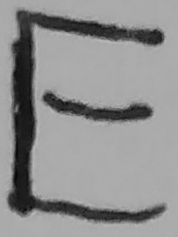

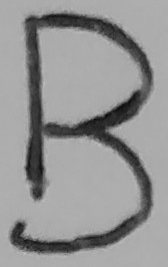

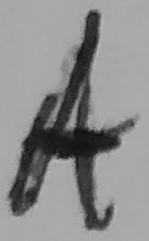

In [ ]:
for i in letters:
  cv2_imshow(i)

In [ ]:
letters[0]

array([[168, 168, 169, ..., 171, 171, 170],
       [168, 168, 169, ..., 171, 171, 170],
       [168, 169, 169, ..., 171, 171, 170],
       ...,
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 171, 170, 170]], dtype=uint8)

In [ ]:
letters_bw = []
for letter in letters:
  (thresh, blackAndWhiteLetter) = cv.threshold(letter, 127, 255, cv.THRESH_BINARY)
  letters_bw.append(blackAndWhiteLetter)

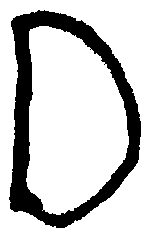

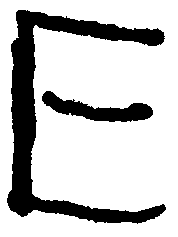

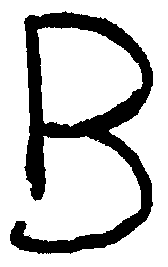

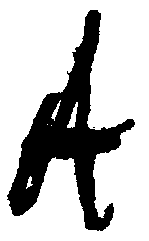

In [ ]:
for i in letters_bw:
  cv2_imshow(i)

In [ ]:
resized_letters = []
for letter_bw in letters_bw:
  resized_letter = cv.resize(letter_bw, (28,28), interpolation = cv.INTER_AREA)
  resized_letters.append(255-resized_letter)

In [ ]:
for i in resized_letters:
  cv2_imshow(i)

In [ ]:
import pandas as pd
pd.read_csv()